In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("crocodile_dataset.csv")

# Clean column names
df.columns = (df.columns
              .str.strip()
              .str.replace(' ', '_', regex=False)
              .str.replace('(', '', regex=False)
              .str.replace(')', '', regex=False)
              .str.replace('/', '_', regex=False)
              .str.replace('-', '_', regex=False)
              .str.lower())

df.head()

,observation_id,common_name,scientific_name,family,genus,observed_length_m,observed_weight_kg,age_class,sex,date_of_observation,country_region,habitat_type,conservation_status,observer_name,notes
0,1,Morelet's Crocodile,Crocodylus moreletii,Crocodylidae,Crocodylus,1.90,62.0,Adult,Male,31-03-2018,Belize,Swamps,Least Concern,Allison Hill,Cause bill scientist nation opportunity.
1,2,American Crocodile,Crocodylus acutus,Crocodylidae,Crocodylus,4.09,334.5,Adult,Male,28-01-2015,Venezuela,Mangroves,Vulnerable,Brandon Hall,Ago current practice nation determine operatio...
2,3,Orinoco Crocodile,Crocodylus intermedius,Crocodylidae,Crocodylus,1.08,118.2,Juvenile,Unknown,07-12-2010,Venezuela,Flooded Savannas,Critically Endangered,Melissa Peterson,Democratic shake bill here grow gas enough ana...
3,4,Morelet's Crocodile,Crocodylus moreletii,Crocodylidae,Crocodylus,2.42,90.4,Adult,Male,01-11-2019,Mexico,Rivers,Least Concern,Edward Fuller,Officer relate animal direction eye bag do.
4,5,Mugger Crocodile (Marsh Crocodile),Crocodylus palustris,Crocodylidae,Crocodylus,3.75,269.4,Adult,Unknown,15-07-2019,India,Rivers,Vulnerable,Donald Reid,Class great prove reduce raise author play mov...


count    1000.000000
mean        2.415110
std         1.097542
min         0.140000
25%         1.637500
50%         2.430000
75%         3.010000
max         6.120000
Name: observed_length_m, dtype: float64


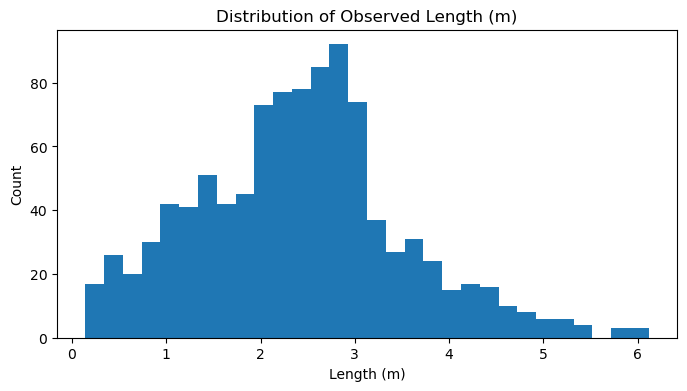

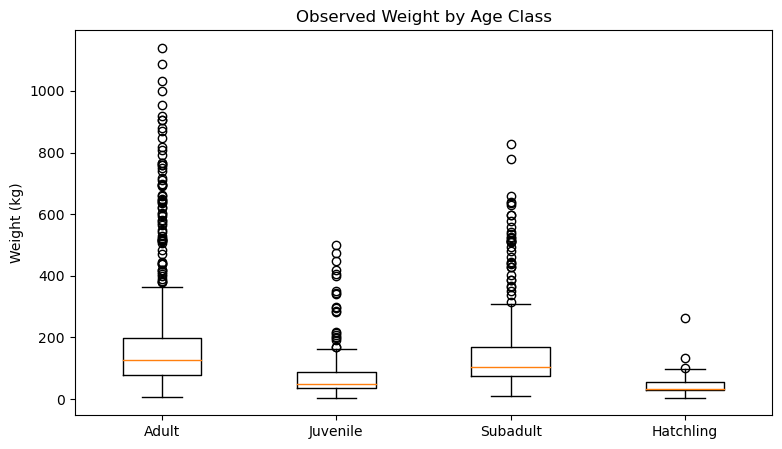

In [ ]:
# Numeric stats
if 'observed_length_m' in df.columns:
    print(df['observed_length_m'].describe())

    plt.figure(figsize=(8,4))
    plt.hist(df['observed_length_m'].dropna(), bins=30)
    plt.title("Distribution of Observed Length (m)")
    plt.xlabel("Length (m)")
    plt.ylabel("Count")
    plt.show()

if 'age_class' in df.columns and 'observed_weight_kg' in df.columns:
    age_order = df['age_class'].dropna().unique().tolist()
    data_box = [df.loc[df['age_class']==a, 'observed_weight_kg'].dropna().values for a in age_order]

    plt.figure(figsize=(9,5))
    plt.boxplot(data_box, labels=age_order)
    plt.title("Observed Weight by Age Class")
    plt.ylabel("Weight (kg)")
    plt.show()

                                        observed_length_m  observed_weight_kg
common_name                                                                  
Saltwater Crocodile                              4.407759          634.644828
Nile Crocodile                                   3.666667          455.960417
Orinoco Crocodile                                3.021897          295.748276
American Crocodile                               2.878636          189.000000
Mugger Crocodile (Marsh Crocodile)               2.820000          161.242553
Borneo Crocodile (disputed)                      2.517612          117.983582
West African Slender-snouted Crocodile           2.471636          130.036364
Hall's New Guinea Crocodile                      2.401633           96.469388
West African Crocodile                           2.335577          112.628846
Cuban Crocodile                                  2.317966           99.376271


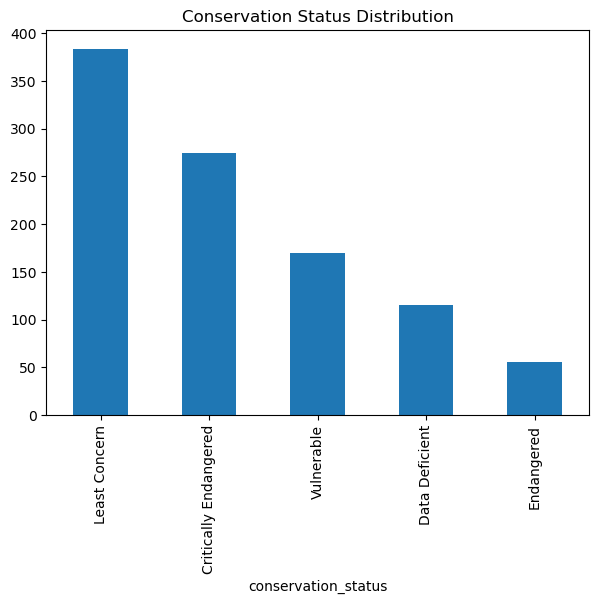

In [ ]:
if 'common_name' in df.columns:
    stats = df.groupby('common_name')[['observed_length_m','observed_weight_kg']].mean()
    print(stats.sort_values('observed_length_m', ascending=False).head(10))

if 'conservation_status' in df.columns:
    df['conservation_status'].value_counts().plot(kind="bar", figsize=(7,5))
    plt.title("Conservation Status Distribution")
    plt.show()

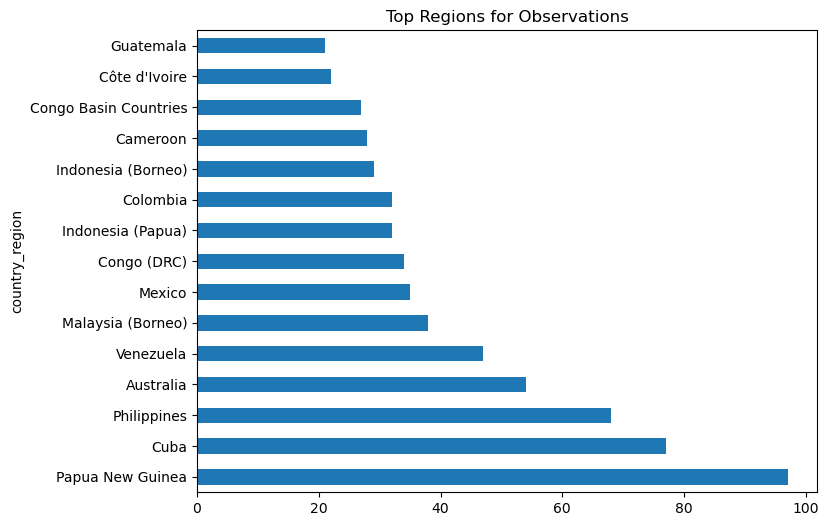

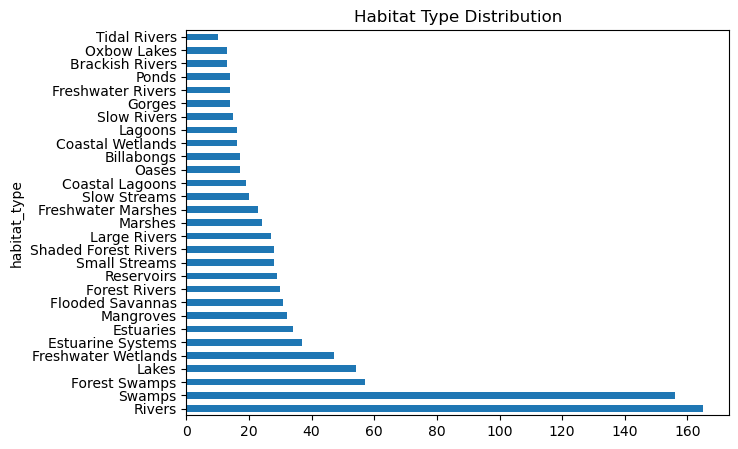

In [ ]:
# Find best matching region column
region_col = None
for c in df.columns:
    if 'country' in c or 'region' in c:
        region_col = c
        break

if region_col:
    df[region_col].value_counts().head(15).plot(kind="barh", figsize=(8,6))
    plt.title("Top Regions for Observations")
    plt.show()

if 'habitat_type' in df.columns:
    df['habitat_type'].value_counts().plot(kind="barh", figsize=(7,5))
    plt.title("Habitat Type Distribution")
    plt.show()

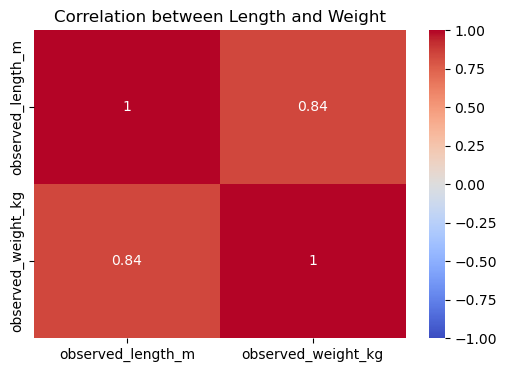

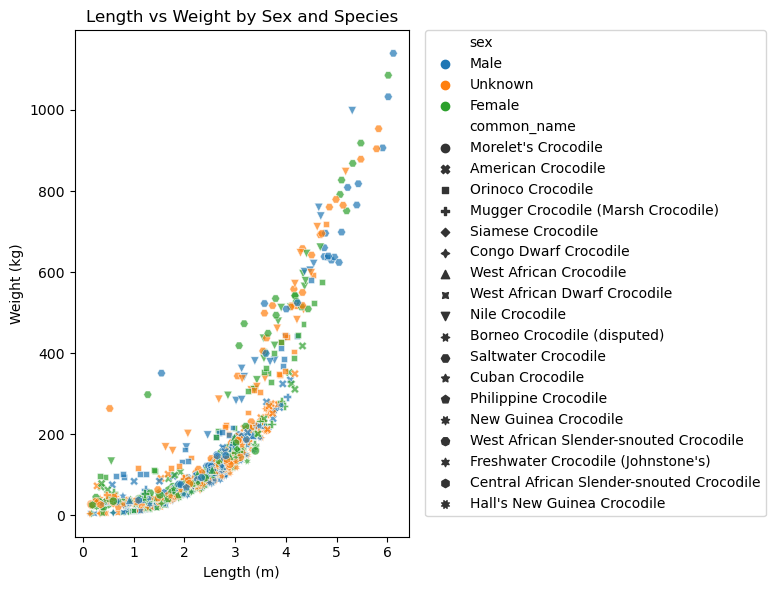

In [ ]:
# --- Relationships & Correlations ---

import seaborn as sns
import matplotlib.pyplot as plt

# Fix date column (dayfirst=True to silence warning)
df['date_of_observation'] = pd.to_datetime(
    df['date_of_observation'],
    errors='coerce',
    dayfirst=True
)

# Convert numeric fields safely
df['observed_length_m'] = pd.to_numeric(df['observed_length_m'], errors='coerce')
df['observed_weight_kg'] = pd.to_numeric(df['observed_weight_kg'], errors='coerce')

# --- Correlation heatmap ---
plt.figure(figsize=(6,4))
sns.heatmap(
    df[['observed_length_m', 'observed_weight_kg']].corr(),
    annot=True, cmap='coolwarm', vmin=-1, vmax=1
)
plt.title("Correlation between Length and Weight")
plt.show()

# --- Scatter plot: Length vs Weight by Sex and Species ---
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='observed_length_m',
    y='observed_weight_kg',
    hue='sex',
    style='common_name',
    alpha=0.7
)
plt.title("Length vs Weight by Sex and Species")
plt.xlabel("Length (m)")
plt.ylabel("Weight (kg)")

# Move legend outside
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()

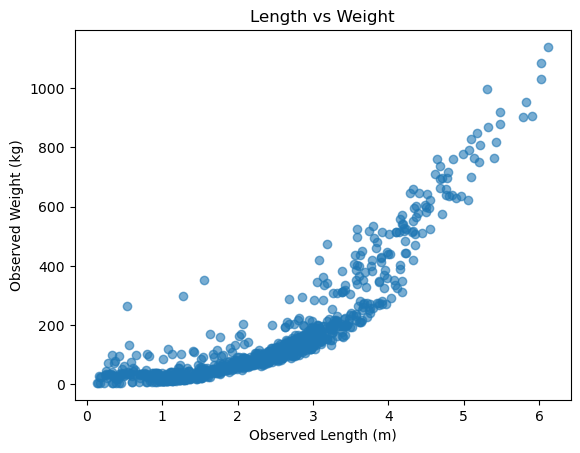

                    observed_length_m  observed_weight_kg
observed_length_m            1.000000            0.843435
observed_weight_kg           0.843435            1.000000


In [ ]:
if 'observed_length_m' in df.columns and 'observed_weight_kg' in df.columns:
    plt.scatter(df['observed_length_m'], df['observed_weight_kg'], alpha=0.6)
    plt.xlabel("Observed Length (m)")
    plt.ylabel("Observed Weight (kg)")
    plt.title("Length vs Weight")
    plt.show()

    print(df[['observed_length_m','observed_weight_kg']].corr())

In [ ]:
if 'observed_length_m' in df.columns and 'observed_weight_kg' in df.columns:
    df_model = df[['observed_length_m','observed_weight_kg']].dropna()
    X = df_model[['observed_length_m']]
    y = df_model['observed_weight_kg']

    if len(df_model) >= 10:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        print("R²:", r2_score(y_test, y_pred))
        print("MSE:", mean_squared_error(y_test, y_pred))
        print("Coef:", model.coef_, "Intercept:", model.intercept_)

R²: 0.6745264209729092
MSE: 8309.067422279662
Coef: [137.33890346] Intercept: -175.184829724249


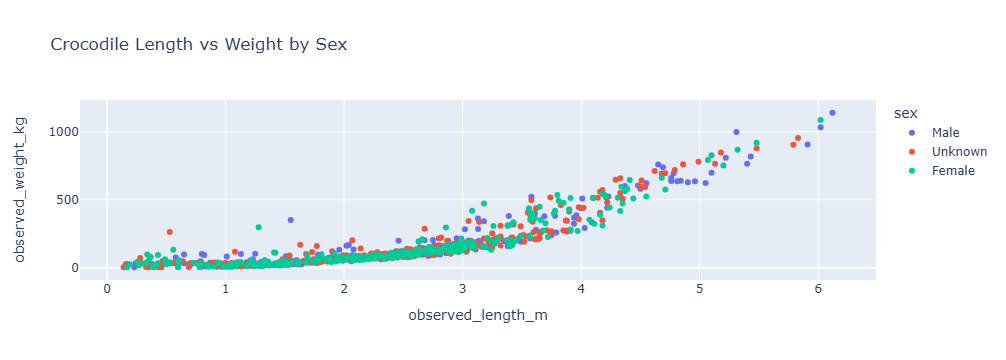

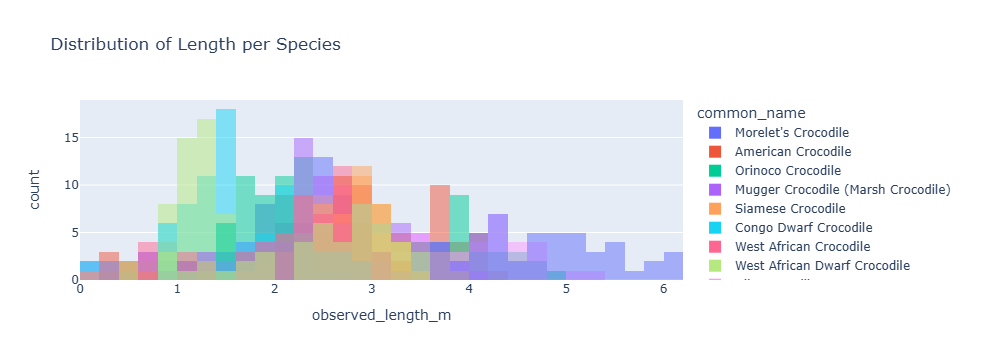

In [ ]:
import plotly.express as px

# 1) Scatter: Length vs Weight by Sex
if "observed_length_m" in df.columns and "observed_weight_kg" in df.columns:
    if "sex" in df.columns and df["sex"].nunique() > 1:
        fig = px.scatter(
            df,
            x="observed_length_m",
            y="observed_weight_kg",
            color="sex",
            hover_data=["common_name","age_class"] if "common_name" in df.columns and "age_class" in df.columns else None,
            title="Crocodile Length vs Weight by Sex"
        )
    else:
        fig = px.scatter(
            df,
            x="observed_length_m",
            y="observed_weight_kg",
            title="Crocodile Length vs Weight"
        )
    fig.show()

# 2) Histogram: Length distribution per species
if "observed_length_m" in df.columns and "common_name" in df.columns:
    if df["common_name"].nunique() > 1:
        fig = px.histogram(
            df,
            x="observed_length_m",
            color="common_name",
            nbins=30,
            barmode="overlay",
            title="Distribution of Length per Species"
        )
    else:
        fig = px.histogram(
            df,
            x="observed_length_m",
            nbins=30,
            title=f"Distribution of Length ({df['common_name'].unique()[0]})"
        )
    fig.show()